# Проект по теме "Принятие решений в бизнесе"

**Ситуация**

Отделом маркетинга крупного интернет-магазина подготовил список гипотез для увеличения выручки.

Проект состоит из двух частей:
- Приоритизация гипотез
- Анализ А\В-теста

## Часть 1. Приоритизация гипотез.

**Входные данные:** список гипотез для увеличения выручки
- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Задача:** приминить фреймворк ICE и RICE для приоритизации гипотез, определить наиболее приоритетные

### Общая информация о данных

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats


import warnings #убрать предупреждения 
warnings.simplefilter("ignore")

pd.set_option('display.max_colwidth', 0) # показать всю стороку


In [2]:
!pip show pandas 

Name: pandas
Version: 1.2.4
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: None
Author-email: None
License: BSD
Location: /opt/conda/lib/python3.9/site-packages
Requires: python-dateutil, pytz, numpy
Required-by: statsmodels, seaborn, catboost


In [3]:
# Импорт таблицы со списоком гипотез

try:
     hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
except:
    hypothesis = pd.read_csv('‪/Users/Taras/Documents/я-практикум/data/data/hypothesis.csv')


In [4]:
# изучим содержание таблицы
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
# изучим информацию о данных
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [6]:
# для удобства переведем названия столбцов в нижний регистр 
hypothesis.columns = hypothesis.columns.str.lower()


### Приоритезация с помощью фреймворка ICE

In [7]:
hypothesis['ICE'] =( hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
ice = hypothesis[['hypothesis','ICE']].sort_values(by='ICE',ascending=False)
ice

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


При использовании фрейсворка ICE более приоритетные гипотезы 
- 8 - Запустить акцию, дающую скидку на товар в день рождения	
- 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	
- 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	

### Приоритезация с помощью фреймворка RICE

In [8]:
hypothesis['RICE'] = (hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
rice = hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE',ascending=False)
rice

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


При использовании фрейсворка RICE более приоритетные гипотезы 
- 7	- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	
- 2	- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	
- 0	- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	

### Вывод

При использовании различных фреймворков приоритет каждой гипотезы очень сильно меняется. Это связано с тем, что в RICE учитывается, скольких пользователей затронет изменение, которое мы хотим внести(Reach). 
Гипотезы с высоким значением Reach при использовании метода RICE получают более высокий приоритет. 
7я гипотеза была на 3 месте, стала на 1м - так как у них высокий Reach. 
А 8-я гипотеза, наоборот опустилась до 5го места, так как ее Reach самый низкий. 

Так как в текущий момент мы приоритезируем гипотезы для увеличения выручки интернет-магазина, логичнее использовать фреймворк RICE, так как в результате оценки этим методом с большим приоритетом будут более дешевые для реализации гипотезы, которые не только сильно повлияют на показатели, но и затронуть большее количество пользователей\клиентов.

Следовательно, топ-3 гипотез с высоким приоритетом:
- 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	
- 2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	
- 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

## Часть 2. Анализ A/B-теста

**Входные данные:**'

1. Данные о заказах:
- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.



2. Данные о количестве пользователей в указанную дату в указанной группе A/B-теста
- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста


**Задача:** 
Принятие решения по результатам A/B-теста теста: 
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

**Исследуемые параметры в A/B-тесте**
1. средний чек группы
2. среднее колличество заказов на посетителя

**Ход исследования:**
1. Проверка корректности входных данных 
2. Анализ распределения трафика по группам
3. Построить графики куммулятивного значени для исследуемых параметров 
4. Построить графики отностельного изменения для исследуемых параметров 
5. Проверить данные на наличие аномалий, определить параметры для исключения аномалий
6. Рассчитать статистическую значимость по сырым данным
7. ассчитать статистическую значимость по очищенным данным
8. Провести анализ и сформлировать выводы

### Общая информация о данных

In [9]:
# Импорт таблицы с данными о заказах

try:
     orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
except:
    orders = pd.read_csv('‪/Users/Taras/Documents/я-практикум/data/data/orders.csv')
    

    
# Импорт таблицы с данными о визитах
try:
     visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')
except:
    visitors = pd.read_csv('‪/Users/Taras/Documents/я-практикум/data/data/visitors.csv')    


In [10]:
# изучим содержание таблицы
print(orders.head(10))

# изучим информацию о данных
orders.info()


   transactionId   visitorId        date  revenue group
0  3667963787     3312258926  2019-08-15  1650     B   
1  2804400009     3642806036  2019-08-15  730      B   
2  2961555356     4069496402  2019-08-15  400      A   
3  3797467345     1196621759  2019-08-15  9759     B   
4  2282983706     2322279887  2019-08-15  2308     B   
5  182168103      935554773   2019-08-15  2210     B   
6  398296753      2900797465  2019-08-15  1860     B   
7  2626614568     78758296    2019-08-15  1044     A   
8  1576988021     295230930   2019-08-15  13710    A   
9  1506739906     1882260405  2019-08-15  1855     B   
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          

In [11]:
# изучим содержание таблицы
print(visitors.head(10))

# изучим информацию о данных
visitors.info()

         date group  visitors
0  2019-08-01  A     719     
1  2019-08-02  A     619     
2  2019-08-03  A     507     
3  2019-08-04  A     717     
4  2019-08-05  A     756     
5  2019-08-06  A     667     
6  2019-08-07  A     644     
7  2019-08-08  A     610     
8  2019-08-09  A     617     
9  2019-08-10  A     406     
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [12]:
#Проверим дубликаты
print(orders.duplicated().sum())
print(visitors.duplicated().sum())


0
0


In [13]:
# приведем столбцы с датой к формату date
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

**Вывод по предварительному анализу:**
- Отсутствуют пропуски и явные дубликаты,
- Столбцы с датой преведены к нужному формату,
- Там, где необходимо, названия столбцов преведены к нихнему регистру.

### Оценка корректности входных данных 

**1. Проверим временные интервалы**

In [14]:
print('Минимальное значение даты заказа', orders['date'].min())
print('Максимальное значение даты заказа', orders['date'].max())
print('Минимальное значение даты визита', visitors['date'].min())
print('Максимальное значение даты визита', visitors['date'].max())

Минимальное значение даты заказа 2019-08-01 00:00:00
Максимальное значение даты заказа 2019-08-31 00:00:00
Минимальное значение даты визита 2019-08-01 00:00:00
Максимальное значение даты визита 2019-08-31 00:00:00


Временные интервалы совпадают. 

**2.Посмотрим как распределился трафик по группам**


In [15]:
#orders.groupby('group')['visitorId'].count()

orders.groupby('group')['visitorId'].nunique()

group
A    503
B    586
Name: visitorId, dtype: int64

Трафик разделен не корректно, пользователей в группе B на 14% (83 покупателя) больше. 
Такое возможно и это не критично, но это стоит отметить в общем выводе по исследованию. 

Проверим попали ли одни и те же пользователи в разные группы. 

In [16]:
# Создадим списки пользователей из группы A и B
# Объединим датасеты, в новом должны отстатьься только те ID, что встречаются и в группе А и в группе B
# Сосчитаем колличество уникальных ID

group_A_users = orders[orders['group']=='A']
group_B_users = orders[orders['group']=='B']

duplicate = group_A_users.merge(group_B_users, on='visitorId', how='inner')

len(duplicate["visitorId"].unique())


58

In [17]:
duplicate

,transactionId_x,visitorId,date_x,revenue_x,group_x,transactionId_y,date_y,revenue_y,group_y
0,2961555356,4069496402,2019-08-15,400,A,1473132782,2019-08-12,640,B
1,2223239646,199603092,2019-08-15,3488,A,437656952,2019-08-02,3488,B
2,62794304,199603092,2019-08-22,6976,A,437656952,2019-08-02,3488,B
3,2971973105,199603092,2019-08-27,2790,A,437656952,2019-08-02,3488,B
4,1941707234,199603092,2019-08-12,6438,A,437656952,2019-08-02,3488,B
...,...,...,...,...,...,...,...,...,...
178,3757656646,4186807279,2019-08-14,4990,A,1759418862,2019-08-21,18560,B
179,3757656646,4186807279,2019-08-14,4990,A,380064637,2019-08-27,13740,B
180,3612788481,2712142231,2019-08-14,2490,A,1251767592,2019-08-16,790,B
181,4052155355,2949041841,2019-08-14,190,A,1329499668,2019-08-14,10380,B


In [20]:
# Создадим список visitorId, которые попали в обе группы
duplicate_id = list(duplicate["visitorId"].unique())


#Найдем в таблице oders строки с таким visitorId  и удалим их 
clear_orders = (orders[orders.visitorId.isin(duplicate_id) == False])

#присвоем значение clear_orders переменной orders, чтобы не исправлять весь код. И если вдруг понадобятся еще исправления их будет проще добавить 
orders = clear_orders

### График кумулятивной выручки по группам

In [21]:
# Создадим массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

#Соберём агрегированные кумулятивные по дням данные о заказах


ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])] \
    .agg({'date' : 'max', 
      'group' : 'max', 
      'transactionId' : 'nunique',
      'visitorId' : 'nunique', 
      'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])] \
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 

#Объединим обе таблицы в одну 
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


In [22]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders', 'visitors']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders', 'visitors' ]]

In [23]:
cumulativeRevenueA.head(5)

,date,revenue,orders,visitors
0,2019-08-01,142779,23,719
2,2019-08-02,234381,42,1338
4,2019-08-03,346854,66,1845
6,2019-08-04,388030,77,2562
8,2019-08-05,474413,99,3318


In [24]:
cumulativeRevenueB.head(5)

,date,revenue,orders,visitors
1,2019-08-01,59758,17,713
3,2019-08-02,221801,40,1294
5,2019-08-03,288850,54,1803
7,2019-08-04,385740,68,2573
9,2019-08-05,475648,89,3280


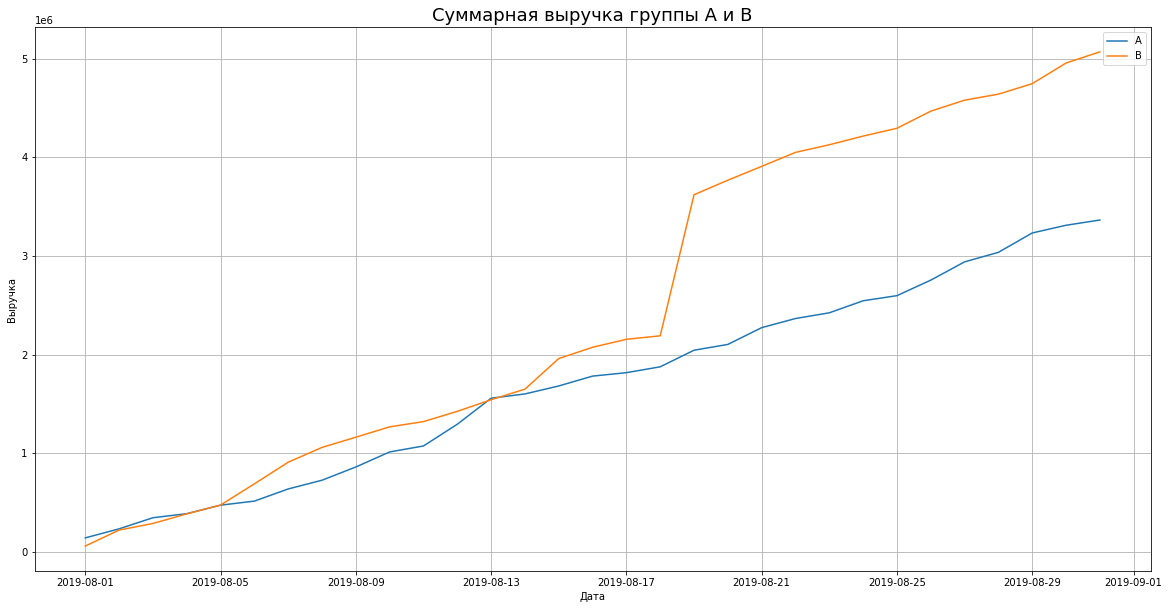

In [25]:
plt.figure(figsize=(20,10))
plt.title('Суммарная выручка группы А и В', fontsize = 18)
plt.ylabel('Выручка')
plt.xlabel('Дата')


# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.grid()
plt.legend() 
plt.show()


**Вывод:**
- К концу временного интервала графики стабилизируются. 
- Есть сильный скачек в группе B 19.08, скорее всего в группу попал заказ с аномально большим чеком или было несколько больших заказов. Мы проверим это далее построив точечный график. 



### График кумулятивного среднего чека по группам.

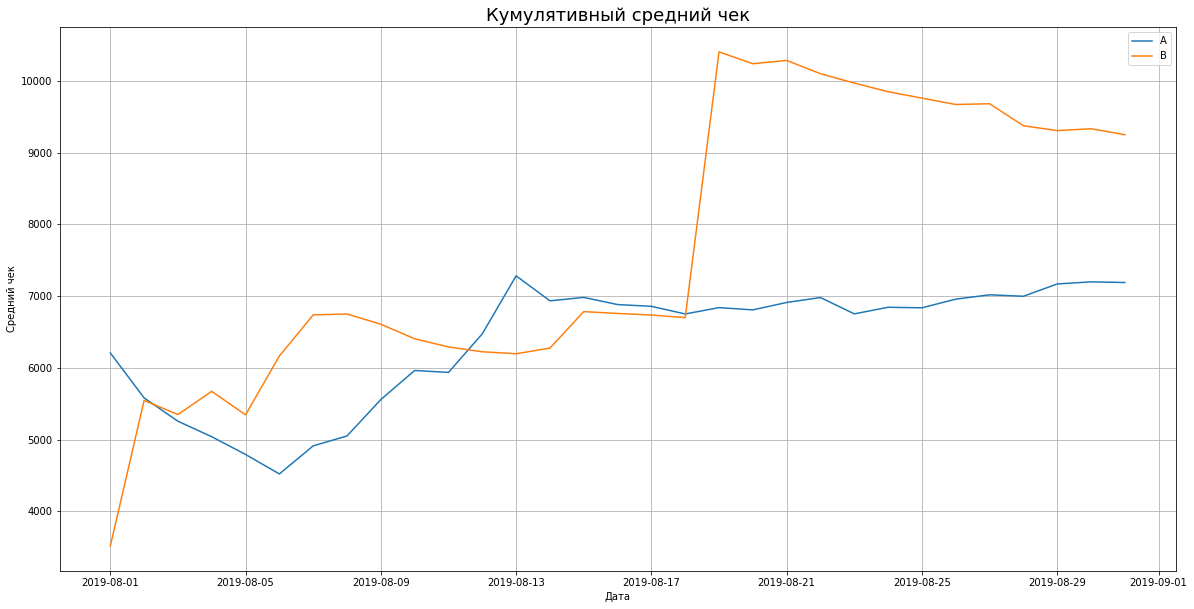

In [26]:
plt.figure(figsize=(20,10))
plt.title('Кумулятивный средний чек', fontsize = 18)
plt.ylabel('Средний чек')
plt.xlabel('Дата')

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.grid()
plt.legend()
plt.show()

**Вывод:**
- Кумулятивный средний чек группы А после до 13 августа рос , но после начал проседать и зафиксировался в районе 7 тыс. 
- Здесь мы тоже видим скачек в группе B, значит это все же влияние анномально-большого чека в этот день. 




### График относительного изменения кумулятивного среднего чека группы B к группе A

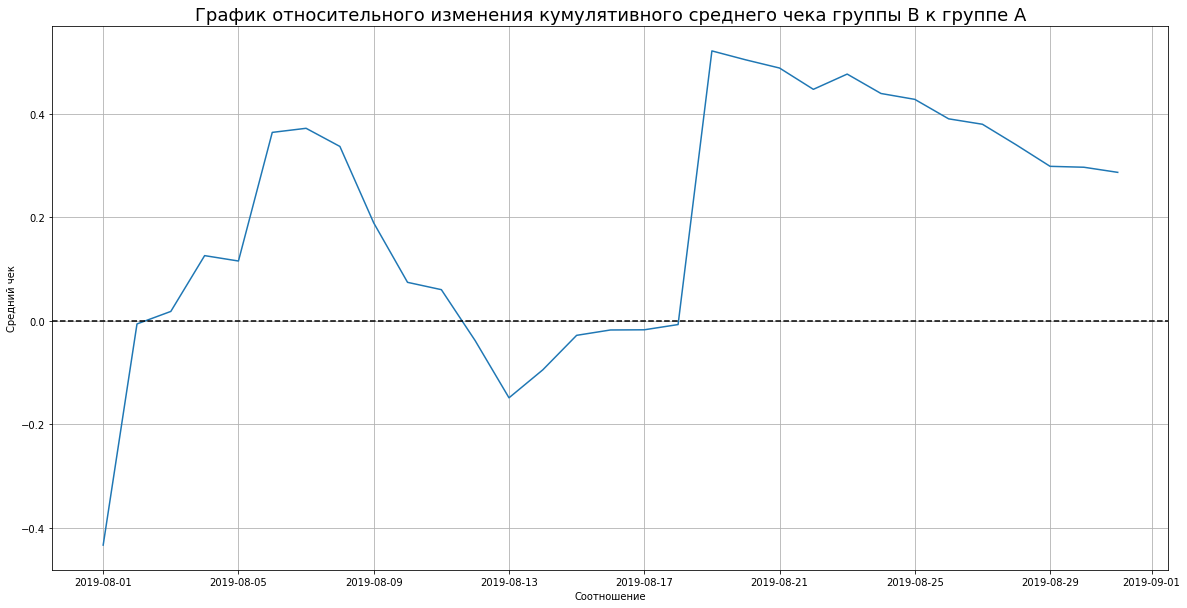

In [27]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])


plt.figure(figsize=(20,10))
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', fontsize = 18)
plt.ylabel('Средний чек')
plt.xlabel('Соотношение')


# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 


plt.grid()

plt.show()

**Вывод:**
- В граффике большие перепады.
- 12 августа средний чек группы B был больше, и оставался таким до скачка, который мы зафиксировали на прдыдущих граффиках.  

### График кумулятивного среднего количества заказов на посетителя по группам.

In [28]:
# добавляем в cumulativeData столбец со средним колличеством чеков на посетителя
cumulativeData['avg_orders'] = cumulativeData['orders']/cumulativeData['visitors']


# отделяем данные по группам
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

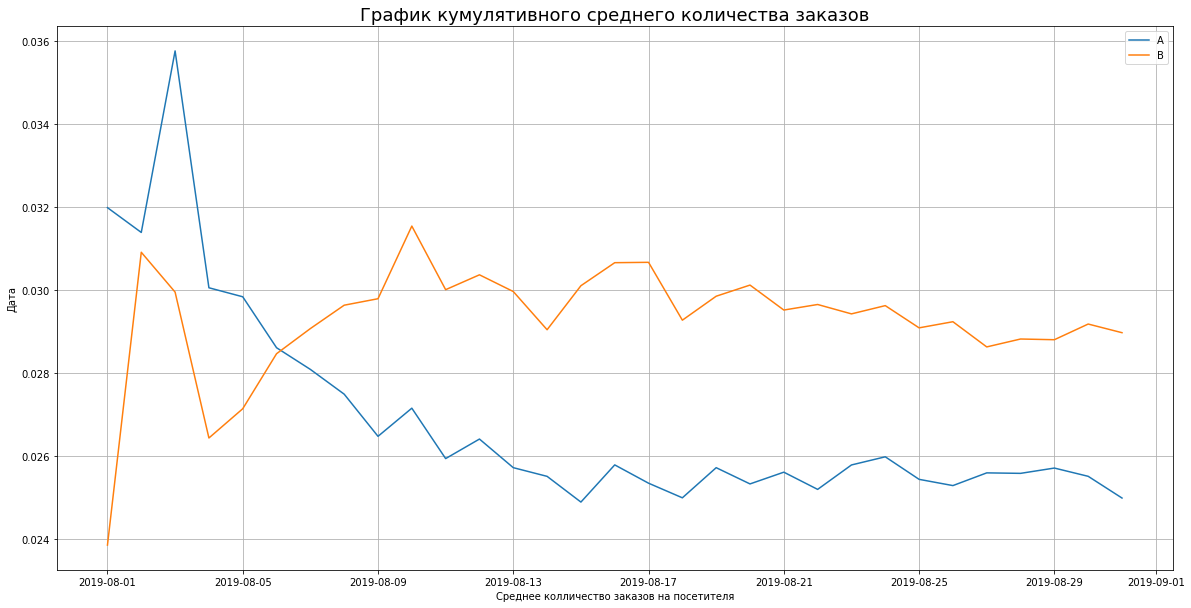

In [29]:
# строим графики
plt.figure(figsize=(20,10))
plt.title('График кумулятивного среднего количества заказов', fontsize = 18)
plt.ylabel('Дата')
plt.xlabel('Среднее колличество заказов на посетителя')


plt.plot(cumulativeDataA['date'], cumulativeDataA['avg_orders'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['avg_orders'], label='B')
plt.legend()
plt.grid()
plt.show()


**Вывод:**
- В начале месяца по колличеству заказов на поситителя лидировала группа А, но достигнув своего пика 3 августа показатель стал падать. 
- Среднее колличество заказов в группе B достигло максимумам к 9 августа, потом плавно снижалась.
- Среднее колличество заказов по предварительному анализу в группе B гораздо больше. 

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

In [30]:
mergedCumulative_avg_orders = cumulativeDataA[['date','avg_orders']].merge(cumulativeDataB[['date','avg_orders']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulative_avg_orders.head(5)


,date,avg_ordersA,avg_ordersB
0,2019-08-01,0.031989,0.023843
1,2019-08-02,0.031390,0.030912
2,2019-08-03,0.035772,0.029950
3,2019-08-04,0.030055,0.026428
4,2019-08-05,0.029837,0.027134


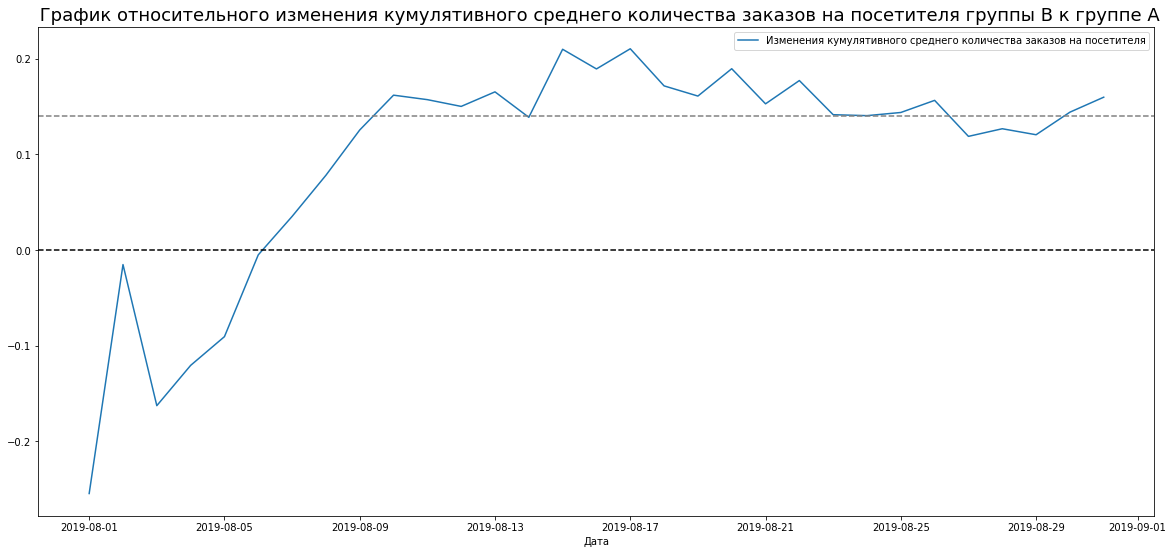

In [31]:
plt.figure(figsize=(20,9))
plt.title(' График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A', fontsize = 18)
plt.xlabel('Дата')


plt.plot(mergedCumulative_avg_orders['date'], mergedCumulative_avg_orders['avg_ordersB']/mergedCumulative_avg_orders['avg_ordersA']-1, label="Изменения кумулятивного среднего количества заказов на посетителя")


plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.14, color='grey', linestyle='--')
#plt.axis(["2019-03-10", '2019-04-23', -0.5, 0.5])
plt.legend()

plt.show()


**Вывод:**

Здесь ситуация аналогичная предыдущему граффику. 
- в начале периода мы видим рост колличества заказов в группе B, а потом резкий перевес в пользу группы А
- после 5 августа среднее колличество заказов в группе B резко выросло и оставалась в лидерах до конца периода. 

### Количества заказов по пользователям. 

Построим точечный график количества заказов по пользователям.

In [32]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 


         userId  orders
908  3967698036  3     
55   249864742   3     
478  2108163459  3     
687  2988190573  3     
890  3908431265  3     
138  611059232   3     
632  2742574263  3     
157  678354126   2     
323  1404560065  2     
452  1985475298  2     


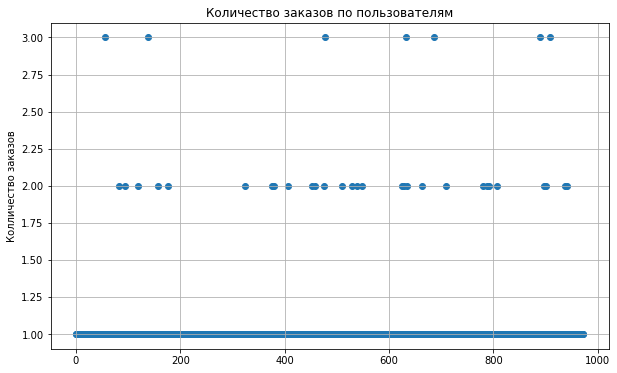

In [33]:
plt.figure(figsize=(10,6))
plt.title('Количество заказов по пользователям', fontsize = 12)
plt.ylabel('Колличество заказов')


x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 

plt.grid()
plt.show()


В основном посетители интернет-магазина совершают один заказ, но есть доля посетителей с 2-3 заказами. 

Посчитаем выборочные перцентили количества заказов на одного пользователя:

In [34]:
print(np.percentile(ordersByUsers['orders'], [ 95, 99])) 


[1. 2.]


95% покупателей совершали 1 заказ, и только 1% совершали повторные покупки

### Cтоимость заказов

Построим точечный график стоимостей заказов.

In [36]:
orders.sort_values(by='revenue', ascending=False).head(10)

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A
949,1347999392,887908475,2019-08-21,60450,A
940,2420050534,4003628586,2019-08-08,58550,B
131,3163614039,2254586615,2019-08-22,53904,A


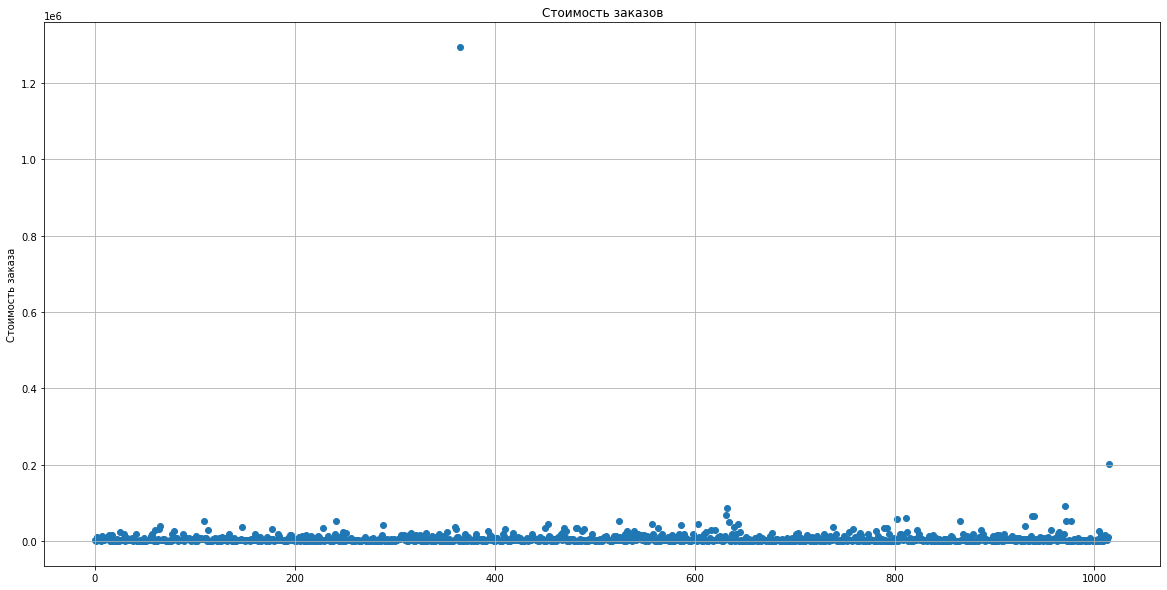

In [37]:
plt.figure(figsize=(20,10))
plt.title('Стоимость заказов', fontsize = 12)
plt.ylabel('Стоимость заказа')

orders.sort_values(by='revenue', ascending=False)
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.scatter(x_values, orders['revenue']) 

plt.grid()
plt.show()

Из-за выбросов график получается не читабельный. Уберем выбросы со стоимостью заказов больше 199990

In [38]:
temp_orders = orders[orders['revenue']<=199990]['revenue']

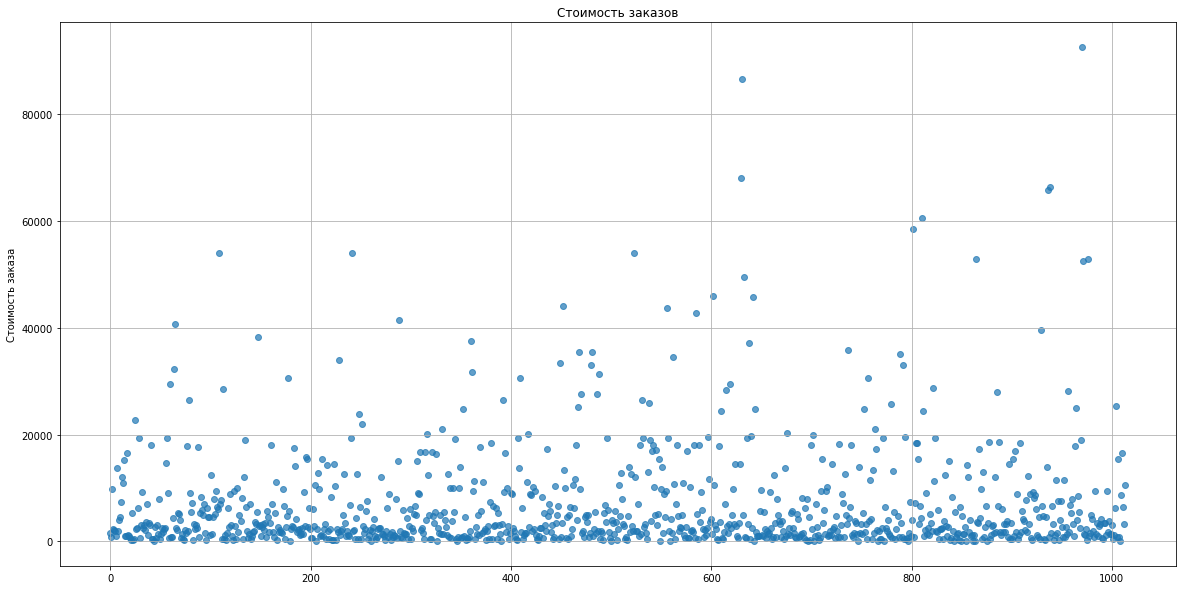

In [39]:

plt.figure(figsize=(20,10))
plt.title('Стоимость заказов', fontsize = 12)
plt.ylabel('Стоимость заказа')


temp_orders = orders[orders['revenue']<=199990]['revenue']
xn_values = pd.Series(range(0,len(temp_orders)))

plt.grid()
plt.scatter(xn_values, temp_orders, alpha=0.7)
plt.show()



По мимо выбросов, на графике видны дорогие заказы. Это объясняет скачек среднего чека в группе ????, там был аномально дорогой заказ. 
Не будем определять границу по которой будем далее фильтровать данные -  посчитаем 95-й и 99-й перцентили стоимости заказов. 

In [40]:
print(np.percentile(orders['revenue'], [ 95, 99])) 


[26785. 53904.]


5% заказов дороже 26785, и 1% дороже 58233.

**Вывод:**
оставляем покупателей с 1 заказом и с чеком не выше 26785

### Cтатистическая значимость

Для анализа результатов А\В-теста будем использовать критерий Манна-Уитни:
1. Выборки независимы друг от друга
2. Необходимо оценить сдвиг значений в разных группах относительно друг-друга, это можно сделать с помощью рангов. 



In [42]:
# Подготовка данных 

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)


In [43]:
data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


#### Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 

**Сформулируем гипотезы.** 
- **H0:** различий в среднем количестве заказов между группами A и B нет. 
- **H1:** различия в среднем между между группами A и B есть.


In [44]:
# Посчитаем статистическую значимость

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 



In [45]:
print('alpha = 0.05')
print("p-value = {0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Отношение показателей группы B и  группы A = {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


alpha = 0.05
p-value = 0.01102
Отношение показателей группы B и  группы A = 0.160


**Вывод** 
- p-value меньше 0.005. Нулевую гипотезу отвергаем, принимая альтернативную - в среднем колличестве заказов между группами есть статистически значимые различия. 
- Относительный прирост среднего группы B к среднему колличеству заказов равен 16 %

#### Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным. 

**Сформулируем гипотезы.** 
- **Н0:** различий в среднем чеке заказа между группами между группами нет (по «сырым» данным). 
- **Н1:** различия в среднем чеке заказа между группами есть (по «сырым» данным).

In [46]:
# Посчитаем статистическую значимость
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


In [47]:
print('alpha = 0.05')
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Отношение показателей группы B и  группы A {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

alpha = 0.05
p-value = 0.829
Отношение показателей группы B и  группы A 0.287


**Вывод** 
Средний чек заказа группы B и больше группы A на 28%, но так как p-value больше 0.05, то для данной выборки, даже значение не является статистически значимым

**Вывод** 


#### Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

In [49]:
# Очистим данные


# Уберем пользователей, у которых более 1 заказов

orders_lim = 1

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > orders_lim]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > orders_lim]['userId'],
    ],
    axis=0,
)

# Уберем заказы дороже 26785

revenue_lim = 26785

usersWithExpensiveOrders = orders[orders['revenue'] > revenue_lim]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

#Узнаем, сколько всего аномальных пользователей атрибутом shape.
 
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
dtype: int64
86


Всего 86 аномальных пользователей. 

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

**Сформулируем гипотезы.** 
- **Нулевая:** различий в среднем количестве заказов между группами нет. 
- **Альтернативная:** различия в среднем между группами есть.


In [50]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [51]:
print('alpha = 0.05')
print('p-value = {0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Отношение показателей группы B и  группы A {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

alpha = 0.05
p-value = 0.01593
Отношение показателей группы B и  группы A 0.174


**Вывод** 
- p-value меньше 0.005. Нулевую гипотезу отвергаем - различия в среднем между группами есть. 
- Относительное различие среднего чека между сегментами целых 17%

#### Cтатистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.

**Сформулируем гипотезы.** 
- **Нулевая:** различий в среднем чеке заказа между группами нет. 
- **Альтернативная:** различия в среднем между группами есть.


In [52]:
print('alpha = 0.05')

print(
    'p-value = {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Отношение показателей группы B и группы A {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 


alpha = 0.05
p-value = 0.727
Отношение показателей группы B и группы A -0.034


**Вывод** 
Относительное различие среднего чека 3,5% в польщу группы B, но так-как p-value больше 0.005 это не является статестически значемым. 


#### Вывод по анализу статистической значимости

Собирем данные вместе:

Среднее количество заказов на посетителя:
- Сырые данные:  p-value = 0.01102, разница между сегментами 16%
- Очищенные данные: p-value = 0.01593, разница между сегментами 17,4% 

Как по сырым, так и по очищенным данным p-value меньше 0,05. Статистическая значимость достигнута. Среднее количество заказов на посетителя в группе B выше  

Средний чек заказа:   
- Сырые данные:    p-value = 0.829 , разница между сегментами 28,7 %
- Очищенные данные: p-value = 0.727,  разница между сегментами незначительна  -3,4%

Как по сырым, так и по очищенным данным p-value гораздо больше 0,05. Вывод о различии сделать нельзя. 

### Вывод 

**Что было сделано**:
1. Проверили корректности входных данных 
2. Проанализировали распределения трафика по группам
3. Построили графики кумулятивного значениz для исследуемых параметров 
4. Построили графики относbтельного изменения для исследуемых параметров 
5. Проверили данные на наличие аномалий, определили параметры для исключения аномалий
6. Рассчитали статистическую значимость по сырым данным
7. Рассчитали статистическую значимость по очищенным данным


**Выводы:**

- 58 покупателей попали в обе группы для тестирования. Мы удадали их из выборки. 
- Группы были поделены не поровну и после удаления перевес сохранился. 
- Мы построили графики кумулятивных значений исследуемых параметров и их относительное изменение кумулятивного среднего, чтобы избежать проблемы подглядывания. По предварительной оценке показатели группы B выше
- На графиках так же были зафиксированы аномальные всплески. На всех среднего чека мы видим скачек 18 августа. На графиках по среднему количеству заказов - скачки в группе B.
- Определили выбросы: для среднего чека более 26 тыс, и больше 1го заказов на покупателя. В результате обнаружено 86 аномальных пользователя, которые не учитывались при расчете по "чистым" данным. 
- Среднее количество заказов на посетителя как по сырым, так и по очищенным данным в группе А больше группы Б, и достигнута статистическая значимость 
- Что касается среднего чека заказа, то вывода о различии нельзя сделать ни по сырым ни по очищенным данным. 





**Решение:**
Останвливаем тест, фиксируем победу группы B. Среднее колличество заказов в грппе B выше на 17%. 
